---
title: "End to End machine learning workflow"
format:
  html:
    code-fold: true
jupyter: python3
---




## Set-up ML environment

In this project we used specific versions of the libraries. Save the following libraries in a text file- `requirements.txt.` Install all these libraries using the code `python -r pip install requirements.txt.`

```python
joblib==1.3.2
streamlit==1.31.1
scikit-learn==1.2.2
pandas==2.0.0
```


## End-to-End Machine Learning Project: Classifying the Iris Dataset

In this project, we will walk through an end-to-end machine learning task using the Iris dataset. This comprehensive exercise will cover all stages of a machine learning pipeline, from data exploration to model deployment

## 1.Introduction to the Dataset

The Iris dataset is a classic dataset in machine learning, widely used for benchmarking classification algorithms. It consists of measurements from 150 iris flowers, with four features- Sepal Length, Sepal Width, Petal Length, and Petal Width. Each sample is labeled with one of three species- Iris-setosa, Iris-versicolor, and Iris-virginica.

##  2.Objective

Our objective is to build a classification model that can accurately predict the species of an iris flower based on its measurements. We will explore the dataset, perform necessary preprocessing, and select an appropriate classification algorithm to achieve this goal.

 ## 3.Data Exploration and Preprocessing
- Exploratory Data Analysis (EDA): We will begin by analyzing the dataset to understand its structure and characteristics. This includes visualizing distributions, checking for missing values, and examining class balance.
In this stage we need to load the dataset using appropriate `python` libraries. We want to follow a systematic approach to understand the dataset’s structure, clean the data, and gain insights. Here’s a step-by-step procedure for EDA using Python. As the first step let’s load necessary `python` libraries for this job.


In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# used to supress warning
import warnings
warnings.filterwarnings('ignore')

In this EDA process, libraries such as `pandas`, `seaborn`, `matplotlib`, and `scikit-learn` are essential. `Pandas` is used for efficient data manipulation and preprocessing, allowing us to load, clean, and manage the dataset seamlessly. `Seaborn` and `matplotlib` provide advanced visualization capabilities to explore the distribution, outliers, and relationships among features, which are crucial for understanding the dataset’s structure and potential issues. Together, these libraries offer a comprehensive toolkit for conducting thorough exploratory data analysis, ensuring that the dataset is well-understood and ready for subsequent modeling.

In the next step, we load the Iris dataset directly from a remote URL using `pandas.` The code `iris_df = pd.read_csv('https://raw.githubusercontent.com/sijuswamy/Model_Deployment/main/iris.csv')` reads the CSV file from the specified GitHub repository and creates a DataFrame named iris_df, which contains the dataset for further analysis.


In [3]:
# loading dataset
iris_df=pd.read_csv('https://raw.githubusercontent.com/sijuswamy/Model_Deployment/main/iris.csv')

*Viewing the beggining Dataset*: The code iris_df.head() displays the first five rows of the iris_df DataFrame, providing a quick overview of the dataset’s structure and the initial entries. We just visualize first 5 samples in the dataset as a table.


In [4]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


*Viewing the End of the Dataset*: The code `iris_df.tail()` displays the last five rows of the `iris_df` DataFrame, offering insight into the final entries and the dataset’s structure at its end.


In [5]:
iris_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


*Checking the Dataset Shape*: The code `iris_df.shape` returns a tuple representing the dimensions of the `iris_df` DataFrame, indicating the number of rows and columns in the dataset.


In [6]:
iris_df.shape

(150, 5)

:::{.callout-tip}
Checking for duplicates is important because duplicate rows can skew analysis, introduce bias, and affect the performance of machine learning models. By identifying and removing duplicates, we ensure that each observation is unique and that the dataset accurately represents the underlying data without redundancy
:::


In [7]:
print(iris_df.duplicated().sum())

1


Identifying Duplicate Rows: The code iris_df[iris_df.duplicated()] filters and displays the duplicate rows in the iris_df DataFrame, allowing us to inspect and address any redundancy in the dataset by showing which rows are duplicated.


In [8]:
iris_df[iris_df.duplicated()]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


Checking Class Distribution and Data Imbalance: The code iris_df['variety'].value_counts() counts the number of occurrences of each unique value in the variety column of the iris_df DataFrame, providing insight into the distribution of classes and helping to identify any class imbalances in the dataset.


In [9]:
iris_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

:::{.callout-caution}
An imbalanced dataset, where some classes are significantly underrepresented compared to others, can lead to biased model performance. It may cause the model to favor the majority class, resulting in poor predictive accuracy for the minority class and skewed evaluation metrics. Addressing class imbalance ensures that the model learns to generalize across all classes effectively, leading to more reliable and fair predictions.
:::
Checking for Missing Values: The code iris_df.isnull().sum(axis=0) calculates the number of missing values for each column in the iris_df DataFrame, helping to identify and address any gaps in the dataset that may need to be handled before analysis or modeling.


In [10]:
iris_df.isnull().sum(axis=0)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Checking for missing values is essential because missing data can compromise the integrity of the analysis and modeling process. By identifying columns with missing values, we can take appropriate steps to handle them—such as imputation or removal—ensuring that the dataset is complete and reliable for generating accurate insights and predictions.

Statistical summary: Checking skewness, kurtosis, and correlation is essential for understanding data distribution and feature relationships. Skewness measures asymmetry; values between -0.5 and 0.5 indicate a fairly normal distribution, while values beyond this range suggest significant skewness. Kurtosis assesses the heaviness of tails; values close to 3 indicate a normal distribution, while values much higher or lower suggest the presence or absence of outliers, respectively. Correlation examines feature relationships, with values close to 1 or -1 indicating strong correlations that could lead to multicollinearity. Analyzing these metrics helps in identifying data transformation needs, managing outliers, and optimizing feature selection, ultimately improving model performance and reliability. Before performing the statistical operations, check for the categorical variables. If so remove them and apply statistical operations on that pruned dataset. The following code will do that.


In [11]:
# Check if 'variety' column exists in the DataFrame
if 'variety' in iris_df.columns:
    removed_col = iris_df["variety"]
    iris_num = iris_df.drop('variety', axis=1)  # Use drop to remove the column and keep the rest
    print("Successfully removed 'variety' column.")
else:
    print("Column 'variety' not found in the DataFrame.")

Successfully removed 'variety' column.


 ## 3.b Statistical Summary- Skewness, Kurtosis and Correlation
 *Checking Skewness*: The code iris_num.skew() calculates the skewness of each numeric column in the iris_num DataFrame, providing insights into the asymmetry of the data distribution. Skewness values between -0.5 and 0.5 suggest a relatively normal distribution, while values outside this range indicate potential skewness that may require transformation for better modeling.


In [12]:
 iris_num.skew()

sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64

*Checking Kurtosis*: The code iris_num.kurt() calculates the kurtosis of each numeric column in the iris_num DataFrame, which measures the “tailedness” of the data distribution. Values close to 3 suggest a distribution similar to the normal distribution, while values significantly higher or lower indicate heavy or light tails, respectively, which may point to the presence of outliers or a lack thereof.


In [13]:
iris_num.kurt()

sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
dtype: float64

## 3.c Exploratory Data Analysis
In this section we will perform various graphical analysis of features over the classes of target.

*Visualizing Class Distribution*: The code print(iris_df['variety'].value_counts()) prints the count of each unique value in the variety column, showing the distribution of classes in the dataset. The sns.countplot(iris_df['variety']) function from Seaborn creates a count plot to visually represent the distribution of classes, helping to easily identify any class imbalances or differences in class frequencies.


In [14]:
print(iris_df['variety'].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


*Visualizing Sepal Dimensions*: The code plt.title('Comparison between sepal width and length') sets the title for the plot, while sns.scatterplot(x=iris_df['sepal.length'], y=iris_df['sepal.width']) creates a scatter plot using Seaborn to visualize the relationship between sepal length and sepal width. This visualization helps in understanding the correlation between these two features and identifying any patterns or trends in the data


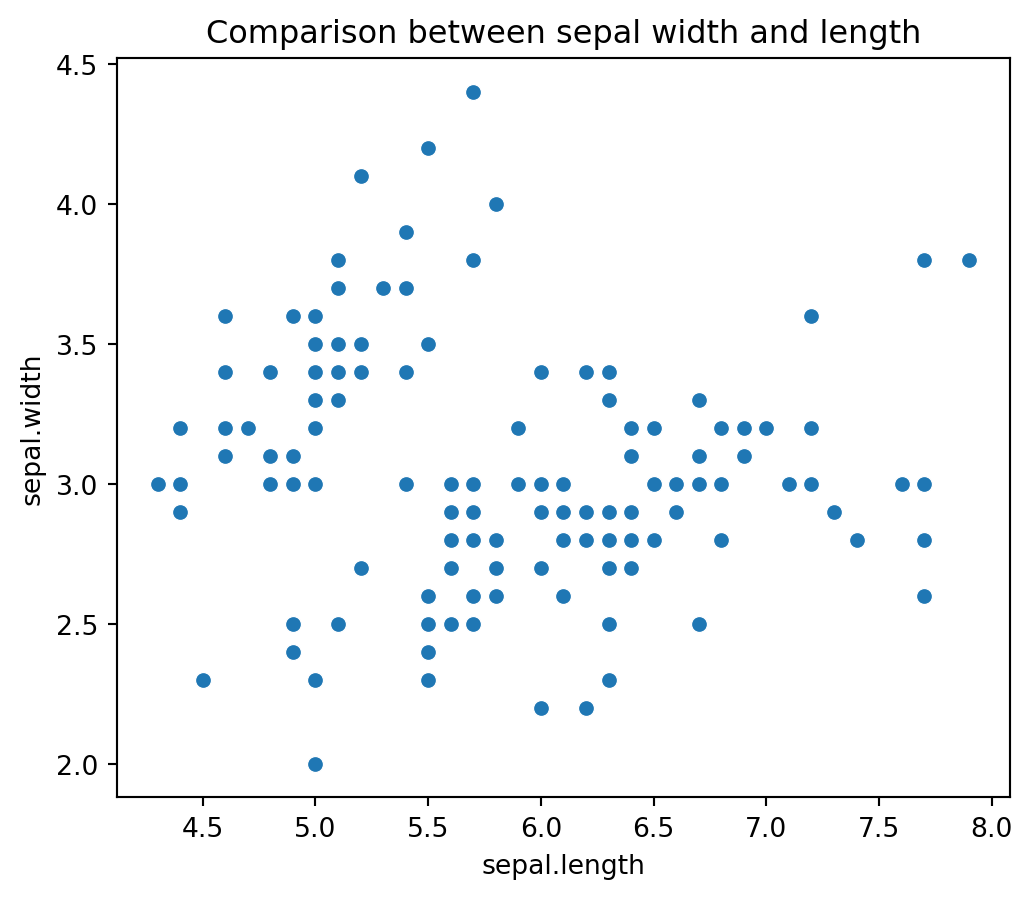

In [15]:
plt.figure(figsize=(6,5))
plt.title('Comparison between sepal width and length')
sns.scatterplot(x=iris_df['sepal.length'], y=iris_df['sepal.width']);

*Enhanced Scatter Plot with Species*: The code plt.figure(figsize=(16,9)) sets the size of the plot, and plt.title('Comparison between sepal width and length on the basis of species') adds a title to the plot. The sns.scatterplot(x=iris_df['sepal.length'], y=iris_df['sepal.width'], hue=iris_df['variety'], s=50) function creates a scatter plot where each point represents sepal length and width, with different colors indicating different species. This visualization helps in comparing the sepal dimensions across species and identifying patterns or clusters in the data. The plt.show() command displays the plot.


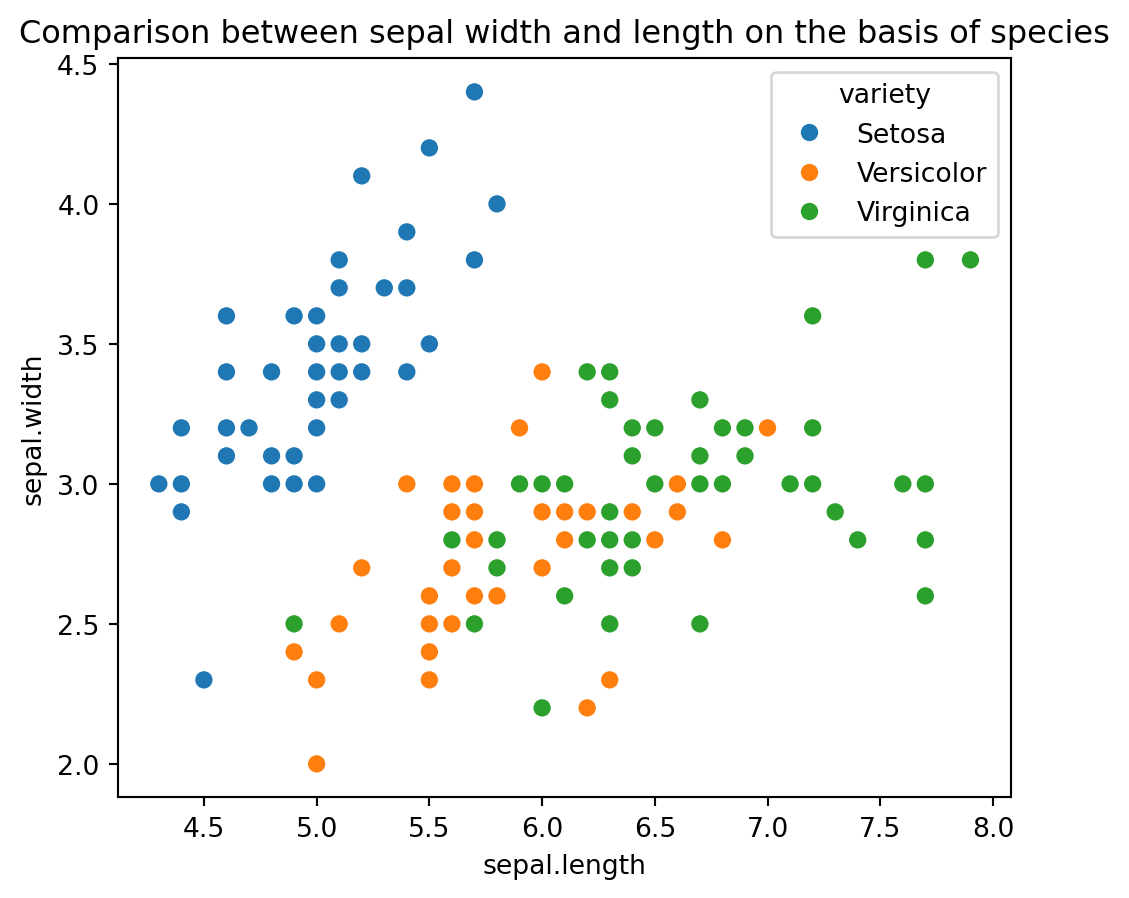

In [16]:
plt.figure(figsize=(6,5))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(x=iris_df['sepal.length'], y=iris_df['sepal.width'], hue = iris_df['variety'], s= 50);
plt.show()

*Visualizing Petal Dimensions*: The code `plt.title('Comparison between petal width and length') `sets the title for the plot, while `sns.scatterplot(x=iris_df['petal.length'], y=iris_df['petal.width'])` creates a scatter plot using Seaborn to visualize the relationship between petal length and petal width. This plot helps in examining the correlation between these two features and understanding how they vary with each other in the dataset


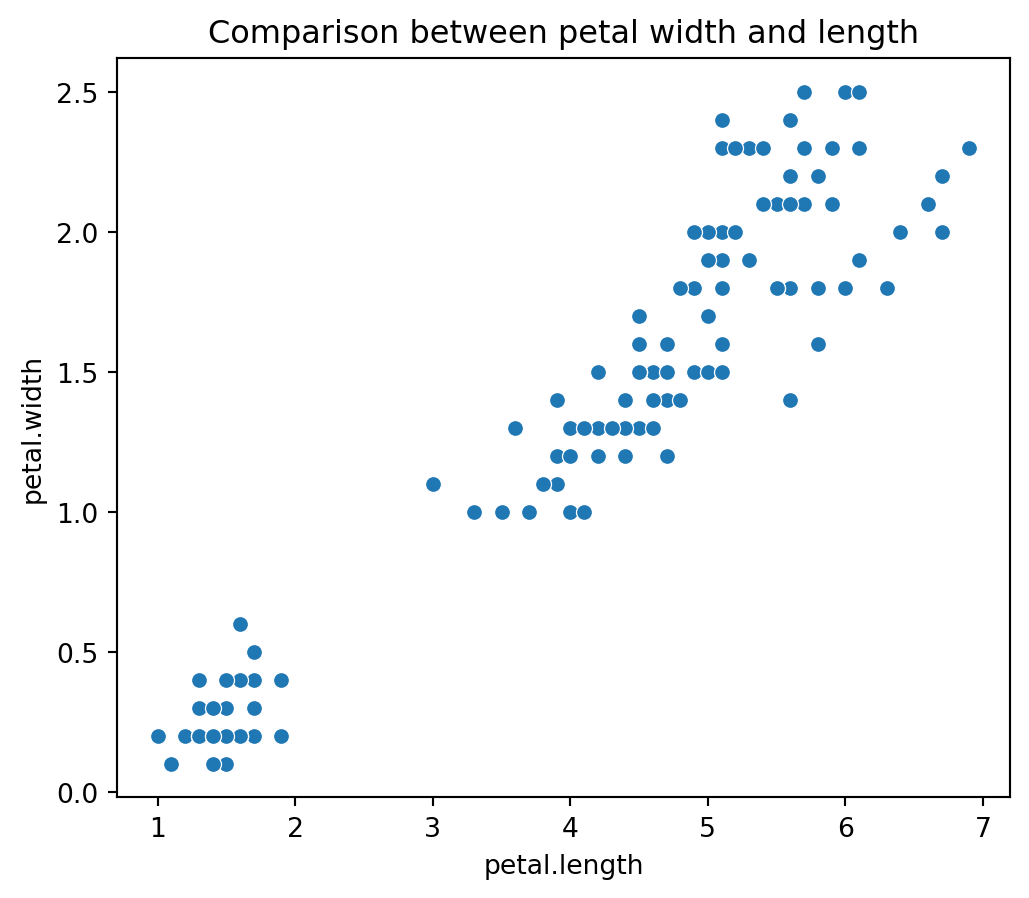

In [17]:
plt.figure(figsize=(6,5))
plt.title('Comparison between petal width and length')
sns.scatterplot(x=iris_df['petal.length'], y=iris_df['petal.width']);

*Enhanced Scatter Plot with Species for Petal Dimensions*: The code `plt.figure(figsize=(10,9)) `sets the size of the plot, and `plt.title('Comparison between Petal width and length on the basis of species')`adds a title. The `sns.scatterplot(x=iris_df['petal.length'], y=iris_df['petal.width'], hue=iris_df['variety'], s=50)` function creates a scatter plot where petal length and width are plotted with different colors representing species. This visualization facilitates comparison of petal dimensions across different species, helping to identify patterns or clusters. The `plt.show()` command displays the plot.


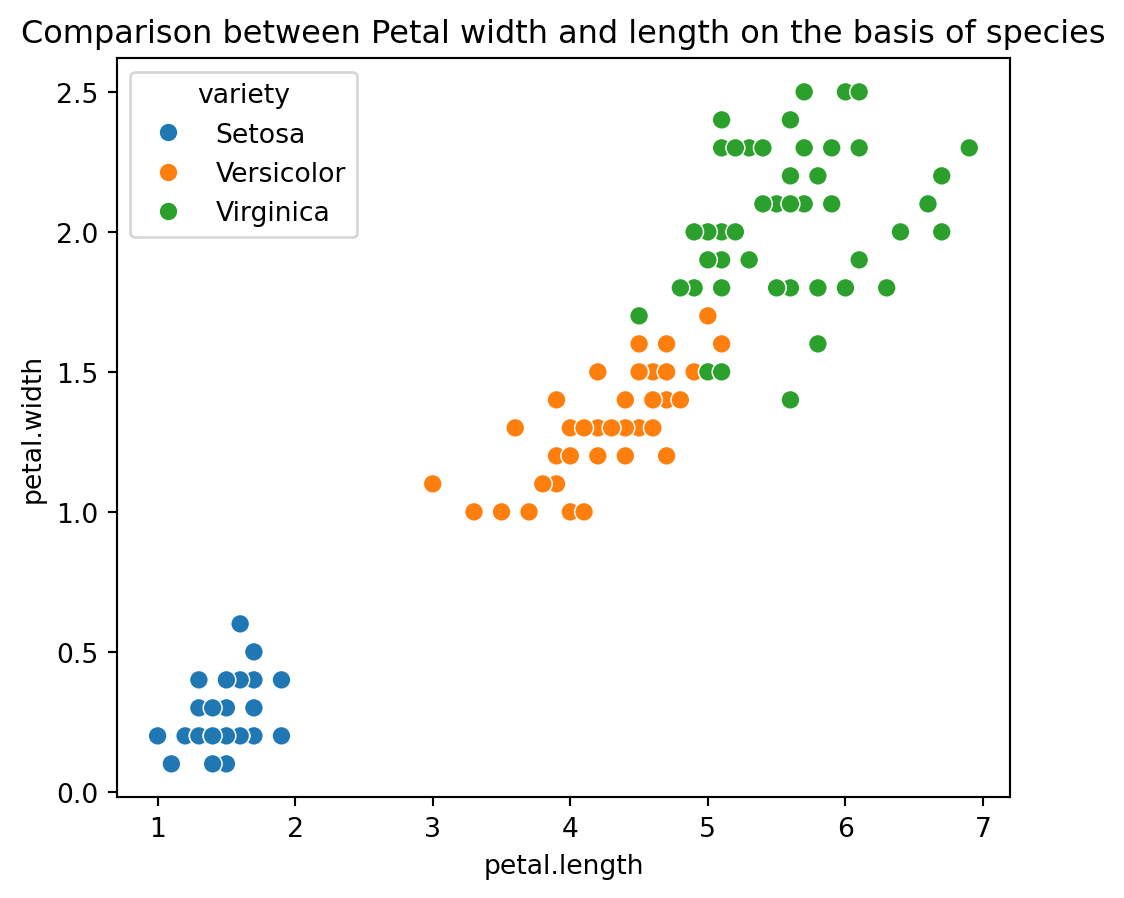

In [18]:
plt.figure(figsize=(6,5))
plt.title('Comparison between Petal width and length on the basis of species')
sns.scatterplot(x=iris_df['petal.length'], y=iris_df['petal.width'], hue = iris_df['variety'], s= 50);
plt.show()

From the above visualizations, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths. We can see two separate clusters but not sure about the species so let’s bring the species into the equation as well.

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

Now let’s visualize all the columns relationship using pair plots.


<Figure size 576x480 with 0 Axes>

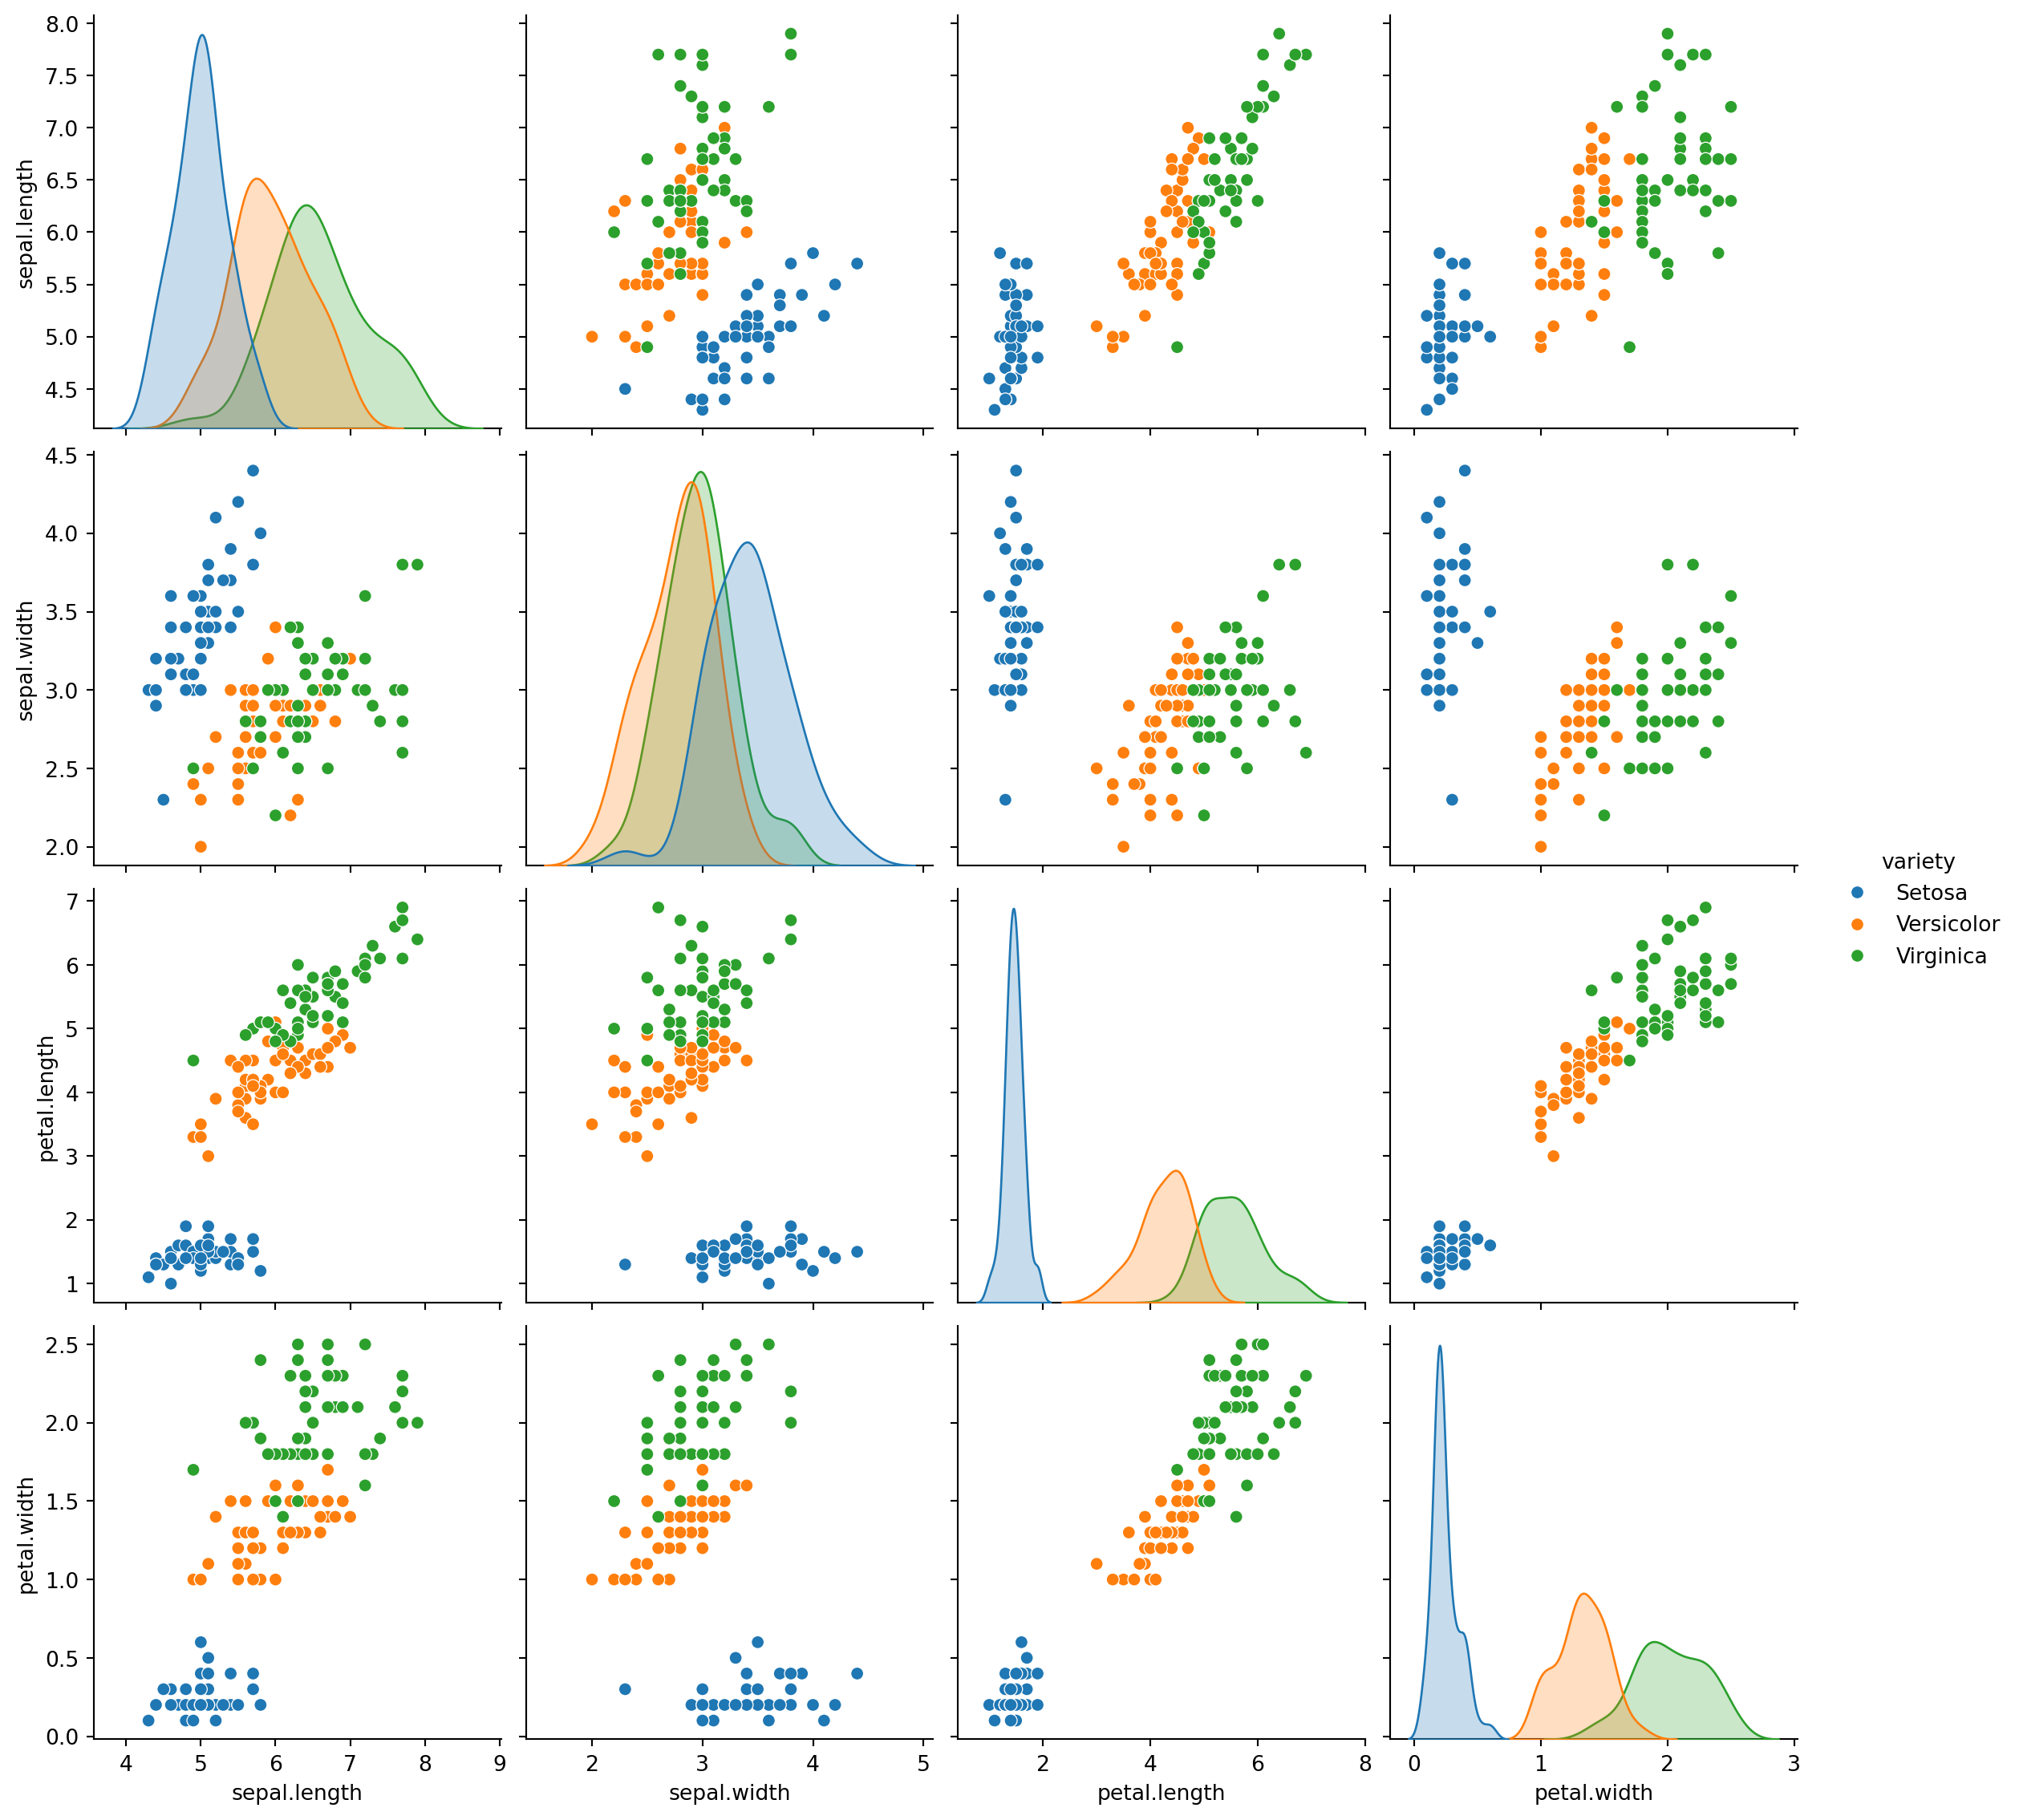

In [19]:
plt.figure(figsize=(6,5))
sns.pairplot(iris_df,hue="variety",height=3);

Summary of EDA: Pair plot represents the relationship between our target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length. Also it is noted that Petal length and petal width are the most suitable features to classify the iris flowers in to its different varities.

Calculating Feature Correlation: The code iris_num.corr() computes the correlation matrix for the numeric columns in the iris_num DataFrame. This matrix shows the pairwise correlation coefficients between features, helping to identify linear relationships and dependencies among them, which can be crucial for feature selection and understanding multicollinearity in the dataset.


In [20]:
iris_num.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


A visual representation of the correlation matrix is shown below.


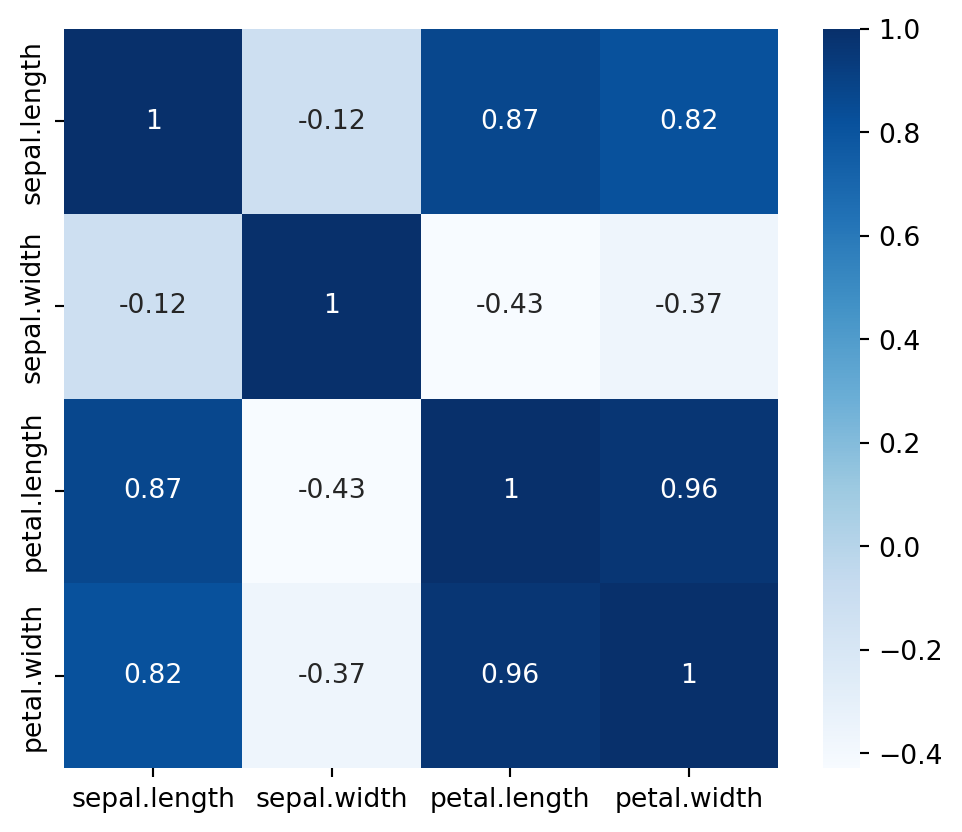

In [21]:
fig = plt.figure(figsize = (6,5))
sns.heatmap(iris_num.corr(), cmap='Blues', annot = True);

From the above heatmap, we see that petal length and petal width have a high correlation, petal width and sepal length have good correlation as well as petal length and sepal length have good correlations.
*Frequency distribution of feature set*: Let’s see the distribution of data for the various columns of our data set.


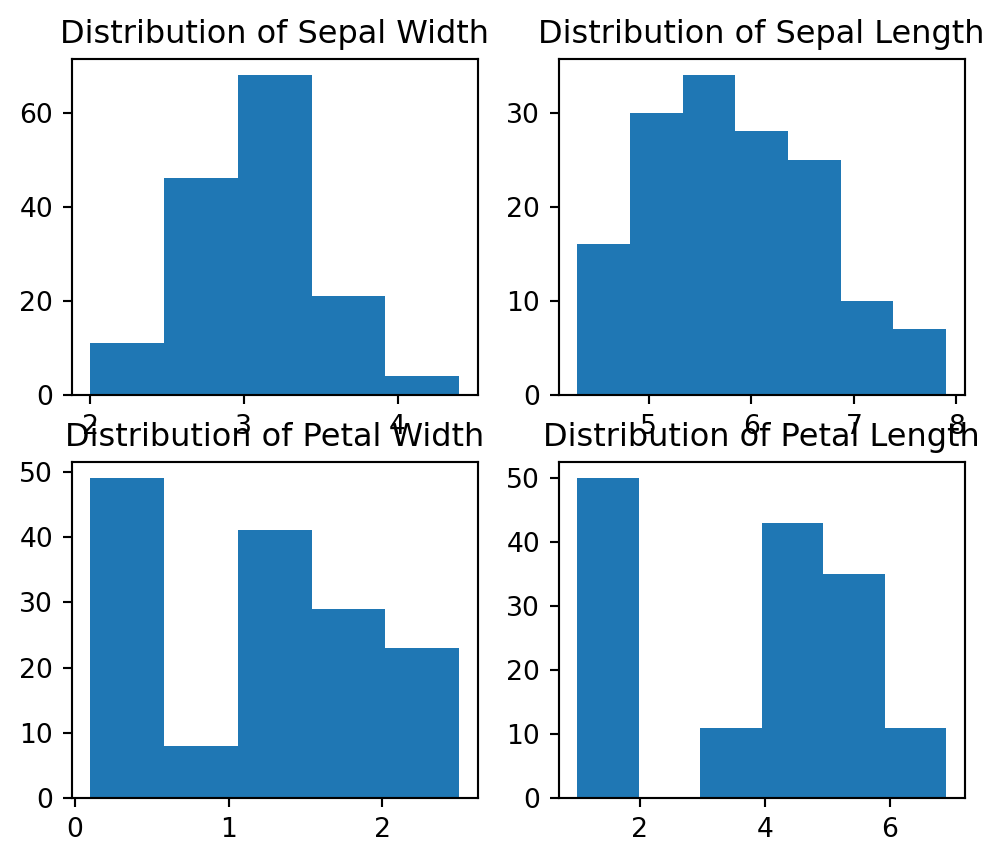

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(6,5))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal.width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal.length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal.width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal.length'], bins=6);

## 3.d Univariate Feature Analysis


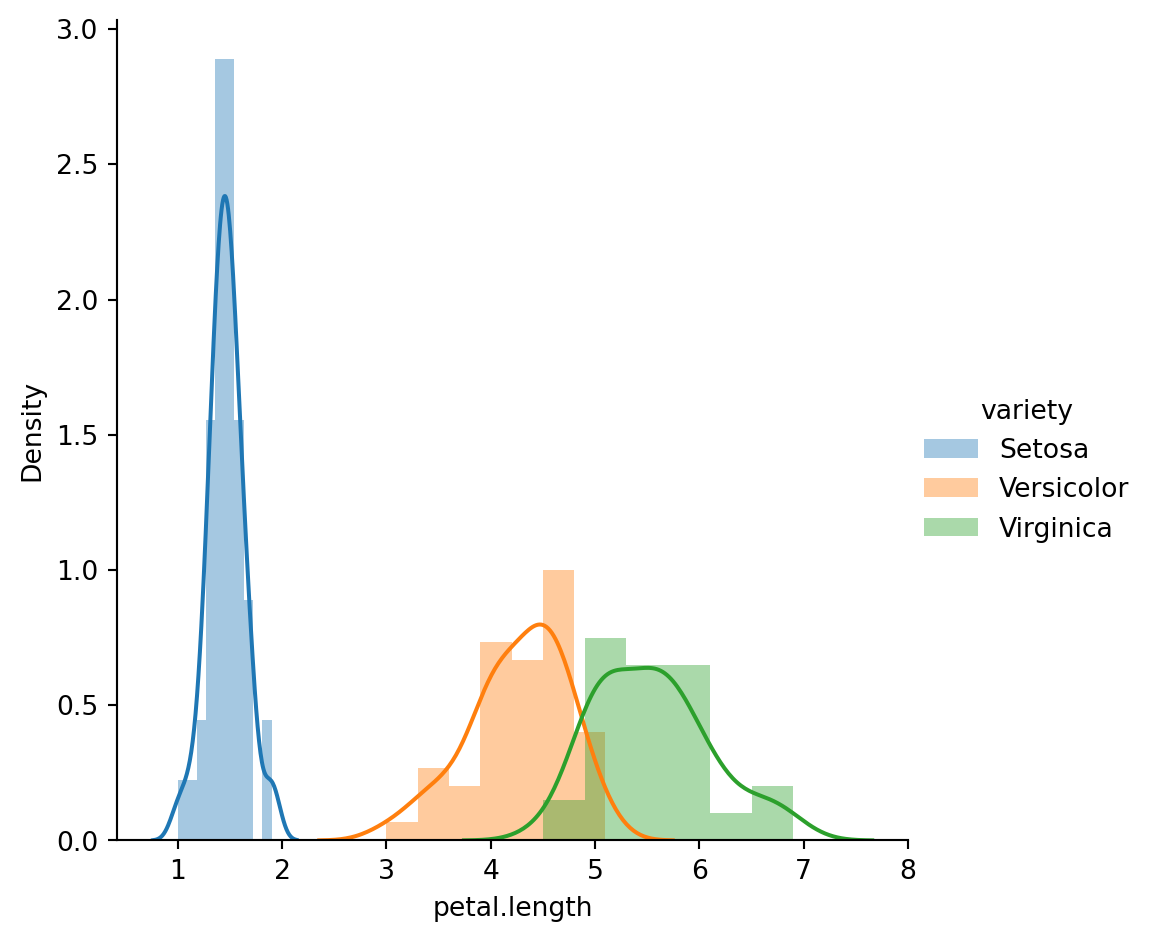

In [23]:
sns.FacetGrid(iris_df,hue="variety",height=5).map(sns.distplot,"petal.length").add_legend();

**Univariate feature analysis**: The code sns.FacetGrid(iris_df, hue="variety", height=5).map(sns.distplot, "petal.width").add_legend() creates a FacetGrid using Seaborn library to visualize the distribution of petal.width across different species in the iris_df DataFrame. The hue="variety" parameter ensures that the distribution plots are colored according to the species, while height=5 sets the size of the plots. This visualization helps in analyzing the distribution and density of the petal width feature for each species, providing insights into how this feature varies across different classes.


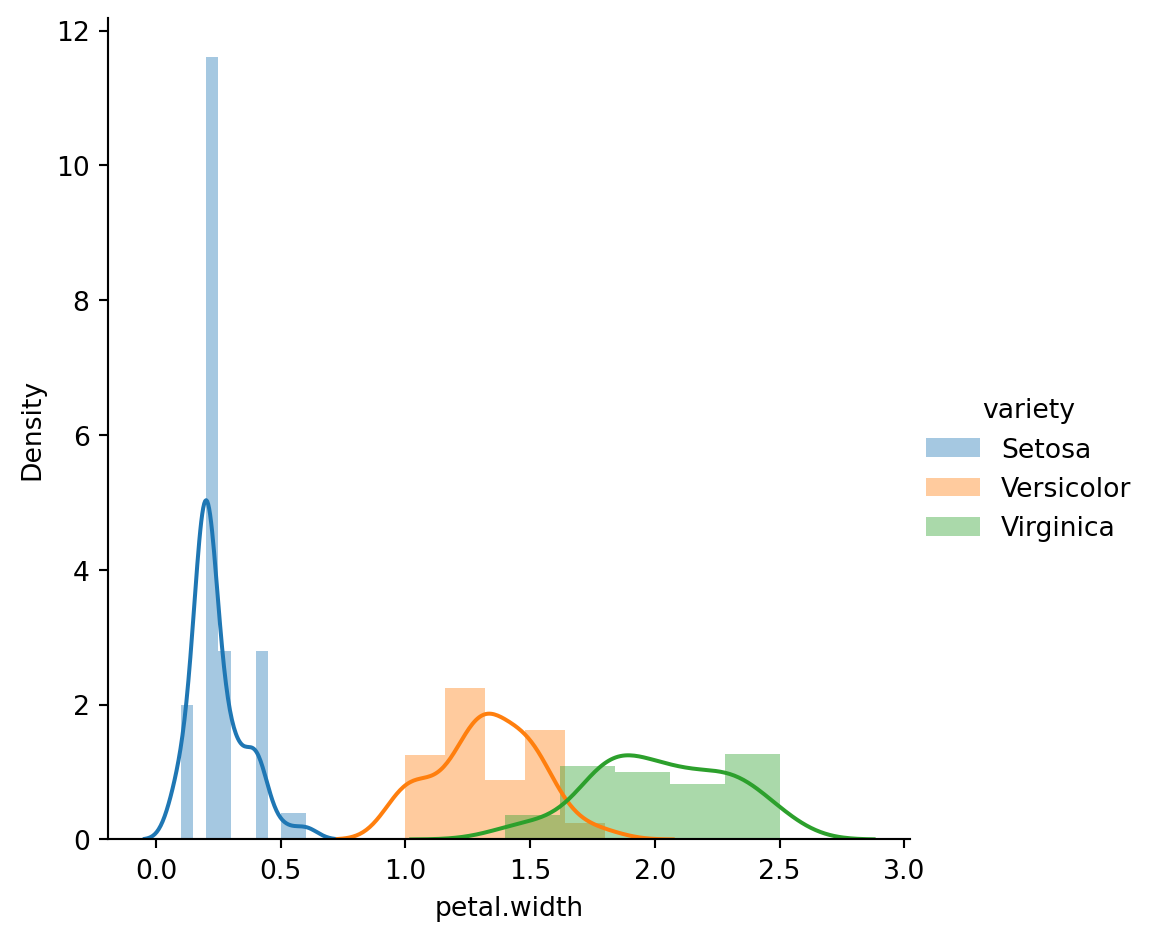

In [24]:
sns.FacetGrid(iris_df,hue="variety",height=5).map(sns.distplot,"petal.width").add_legend();

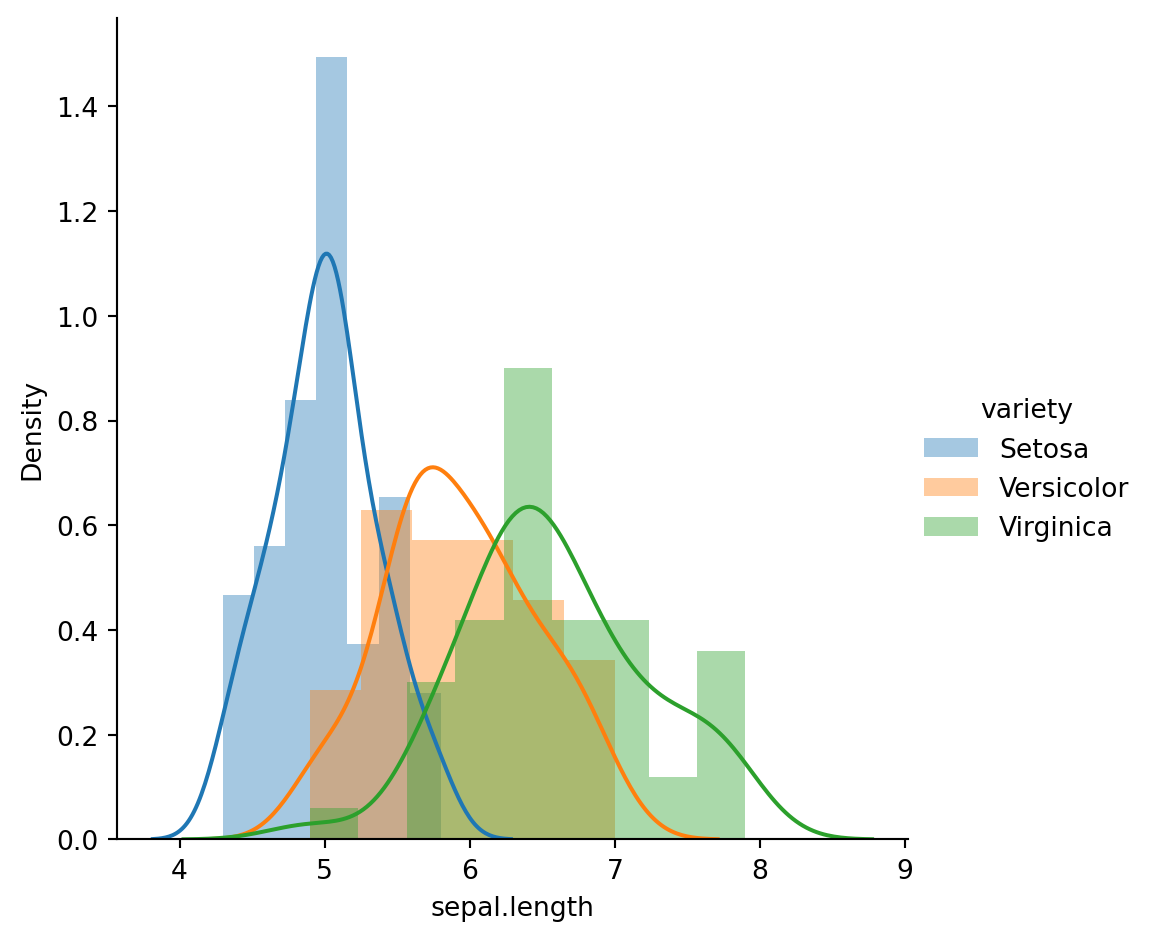

In [25]:
sns.FacetGrid(iris_df,hue="variety",height=5).map(sns.distplot,"sepal.length").add_legend();

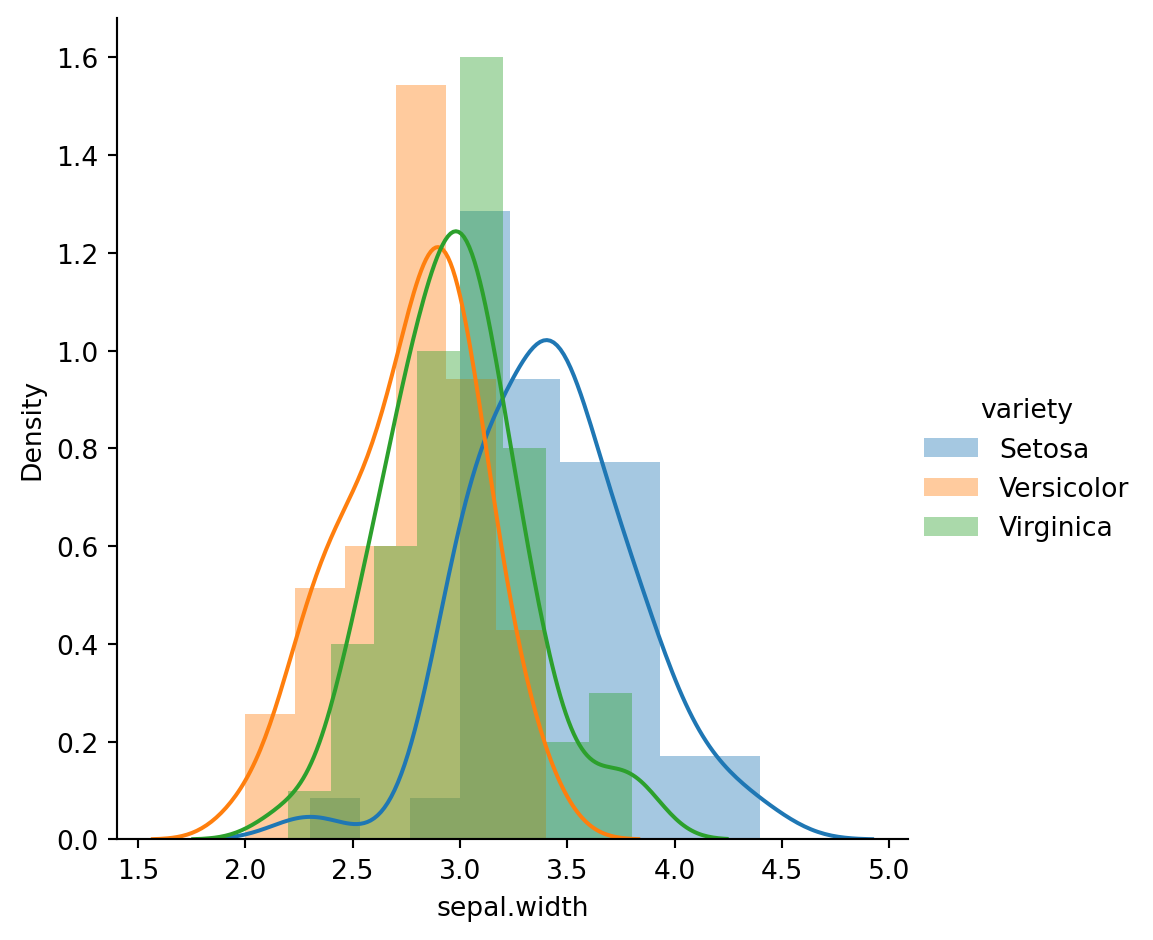

In [26]:
sns.FacetGrid(iris_df,hue="variety",height=5).map(sns.distplot,"sepal.width").add_legend();

## 3.e Statistical Feature Analysis
In this section various features are analysed in more detail. Presence of outlair and normality of feature distribution will be checked before ML model building.

Boxplots for Feature Analysis: The code `fig, axes = plt.subplots(2, 2, figsize=(16,9))` creates a 2x2 grid of subplots with a figure size of 16x9 inches. Each `sns.boxplot()` function call plots the distribution of a specific feature `(petal.width, petal.length, sepal.length, sepal.width)` against the `variety` of the iris species. The `orient='v'` parameter specifies vertical boxplots. This visualization helps in comparing the distributions of different features across species, highlighting differences in feature ranges, central tendencies, and potential outliers. The `plt.show()` command displays all the plots.


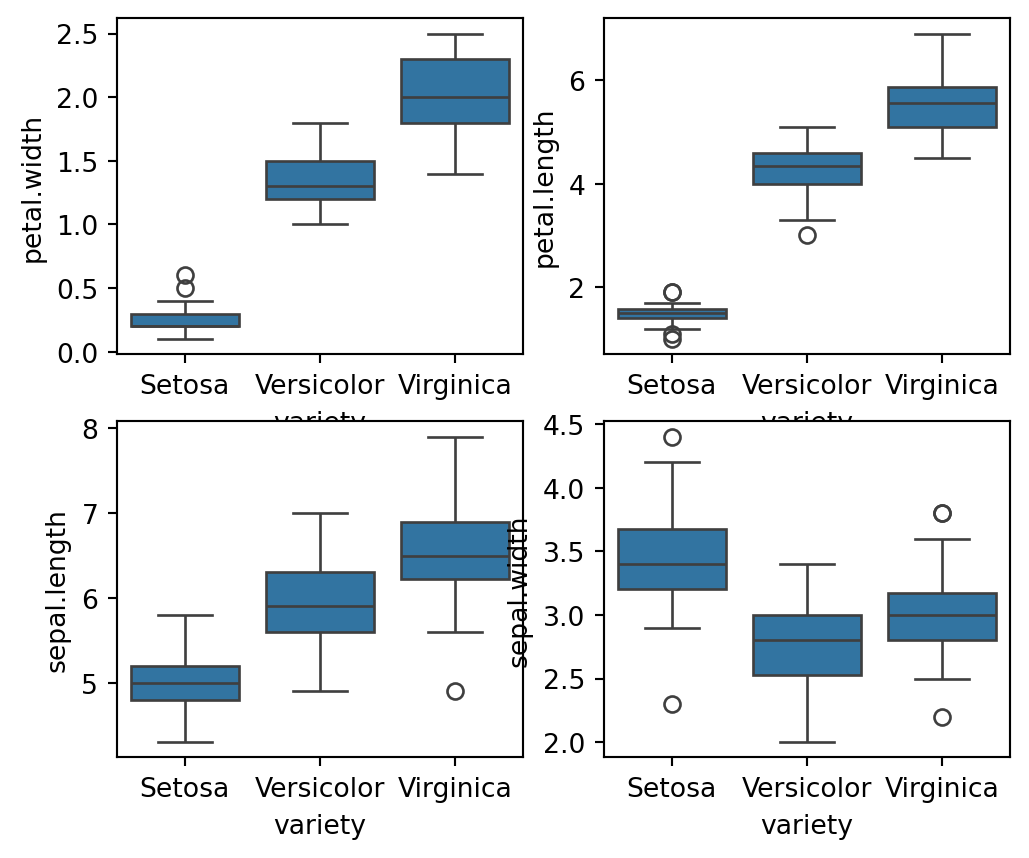

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(6,5))
sns.boxplot(  y="petal.width", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal.width", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

The box plots describe that:

- The setosa usually has smaller features with few outliers.

- The Versicolor species has average features

- The virginica species has the longest features widths and lengths as compared to others.
We can further see the distributions using the violin plot on our dataset


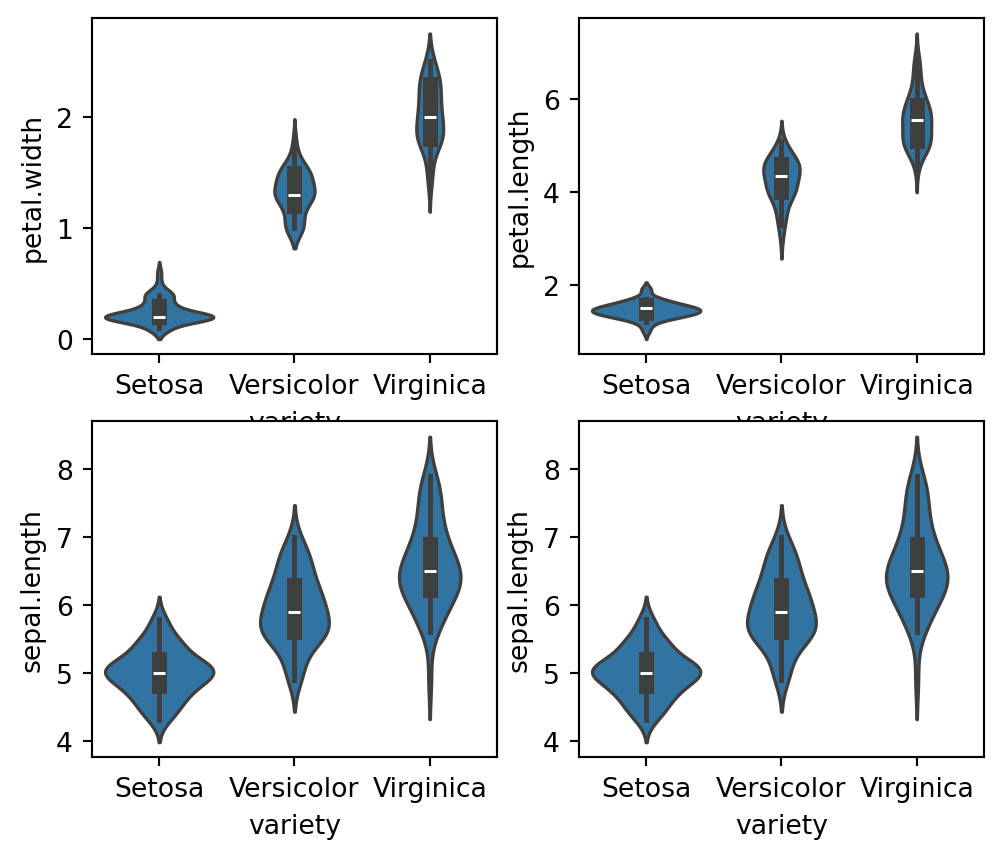

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(6,5))
sns.violinplot(y="petal.width", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

The kernel density of the data along with the full distribution of the data is shown through the violin plots. We can see the probability density of the various features. Inshort, even the basic EDA give us deeper insight about the data and give hints for classification/ regression models on feature sets.

## 4. Model Identification and Training
Based on our data exploration, we will select a suitable classification model. Based on the Exploratory Data Analysis (EDA), we found that petal.length and petal.width are the most influential features for determining the variety of the Iris flower. To classify the Iris dataset, several classification models can be employed. In this discussion, we will consider Logistic Regression, K-nn, Support Vector Machine, Decision Tree and Random Forest algorithms.

### 1. Logistic Regression
Logistic Regression is a simple yet effective classification algorithm that models the probability of a class label based on input features. It’s suitable for binary and multiclass classification problems and works well when the relationship between features and target is approximately linear.

### 2. k-Nearest Neighbors (k-NN)
k-Nearest Neighbors is a non-parametric method used for classification. It works by finding the k nearest data points to a given point and assigning the class that is most common among these neighbors. It is effective for datasets where the decision boundary is non-linear.

### 3. Support Vector Machine (SVM)
Support Vector Machine is a powerful classification technique that works by finding the hyperplane that best separates the classes in the feature space. It is well-suited for datasets with a clear margin of separation and can handle both linear and non-linear classification tasks using kernel tricks.

### 4. Decision Tree
Decision Tree is a model that splits the data into subsets based on the value of input features, creating a tree-like structure of decisions. It is useful for handling both categorical and numerical data and provides a clear model interpretability.

### 5. Random Forest
Random Forest is an ensemble method that combines multiple decision trees to improve classification performance. It reduces overfitting and improves accuracy by averaging the predictions from multiple trees, making it robust and effective for complex datasets.
## Importing Required Libraries
To perform machine learning tasks and evaluate model performance, the following libraries are imported:


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

- **`accuracy_score`** from sklearn.metrics: This function is used to compute the accuracy of the classification model by comparing the predicted labels to the true labels in the test set.
- **`train_test_split`** from `sklearn.model_selection`: This function is used to split the dataset into training and testing subsets, ensuring that the model is trained on one portion of the data and evaluated on a separate portion.
- **`joblib`**: This library is used for saving and loading Python objects efficiently, particularly for persisting trained models for future use.
In the next immediate step, we resample and split the dataset for training and testing. This can be done as follows:


In [30]:
# random seed
seed = 42
iris_df.sample(frac=1, random_state=seed)

# selecting features and target data
X = iris_df[['sepal.length',    'sepal.width',  'petal.length', 'petal.width']]
y = iris_df[['variety']]

# split data into train and test sets
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y)

 In the next section, we will create instances of all the above mentioned classification algorithms one by one.

 ## 1. Logistic Regression 
To Train and Evaluate the Logistic Regression Model, follow these steps.

**Step -1: Import Required Libraries** Here we need only the LogisticRegression instance from the sklearn library. This can be done as follows.


In [31]:
from sklearn.linear_model import LogisticRegression

**Step-2: Initialize the Model**

Create an instance of the Logistic Regression model:


In [32]:
model = LogisticRegression(max_iter=200)

**Step-3. Train the Model**

Fit the model to the training data:


In [33]:
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200)

**Step-4: Make Predictions**
Use the trained model to predict the labels for the test set:


In [34]:
y_pred = model.predict(X_test)

**Step-5 Evaluate the Model**

Assess the model’s performance using confussion matrix, model accuracy and a detailed classification report:


In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate classification report
report = classification_report(y_test, y_pred)

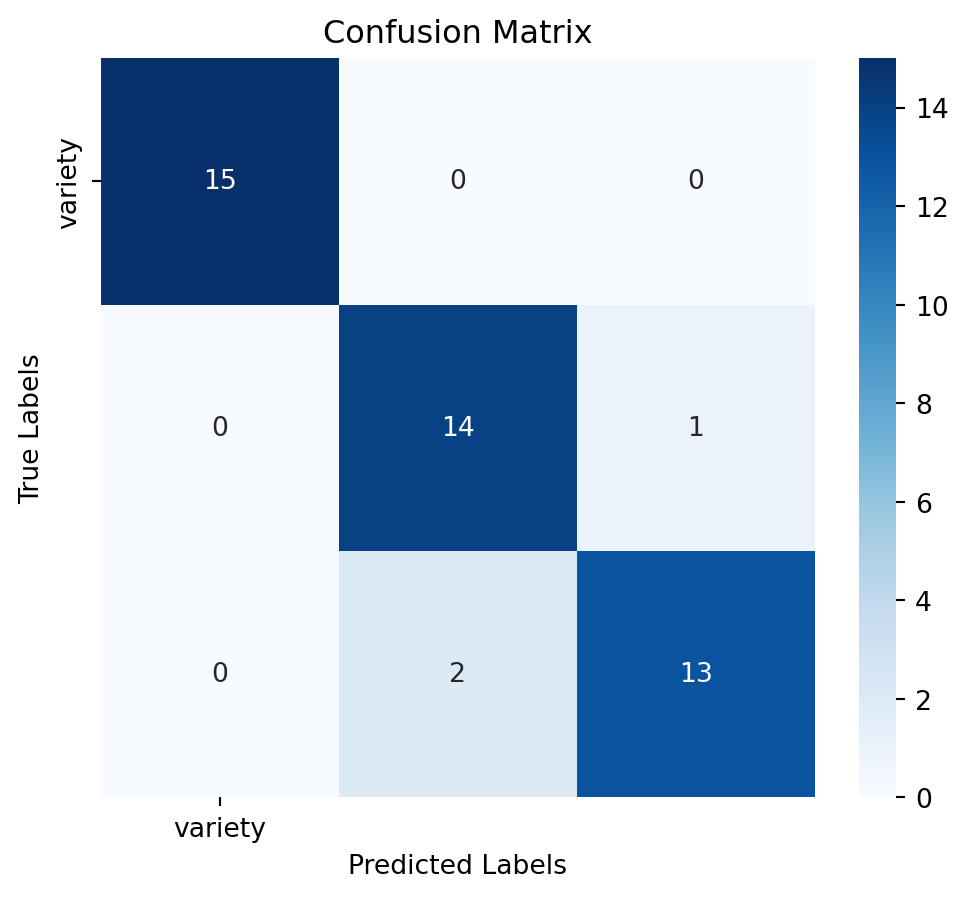

In [36]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



For this project, we will use the RandomForestClassifier, a robust and versatile model that performs well with the Iris dataset.

### 1. K-Nearest Neighbour Classifier
To Train and Evaluate the K-NN Model, follow these steps.

**Step -1: Import Required Libraries** Here we need only the LogisticRegression instance from the sklearn library. This can be done as follows.


In [38]:
from sklearn.neighbors import KNeighborsClassifier

**Step-2: Initialize the Model**

Create an instance of the K-NN model:


In [39]:
model = KNeighborsClassifier(n_neighbors=5)

**Step-3. Train the Model**

Fit the model to the training data:


In [40]:
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

**Step-4: Make Predictions**

Use the trained model to predict the labels for the test set:


In [41]:
y_pred = model.predict(X_test)

**Step-5 Evaluate the Model**

Assess the model’s performance using confussion matrix, model accuracy and a detailed classification report:


In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate classification report
report = classification_report(y_test, y_pred)

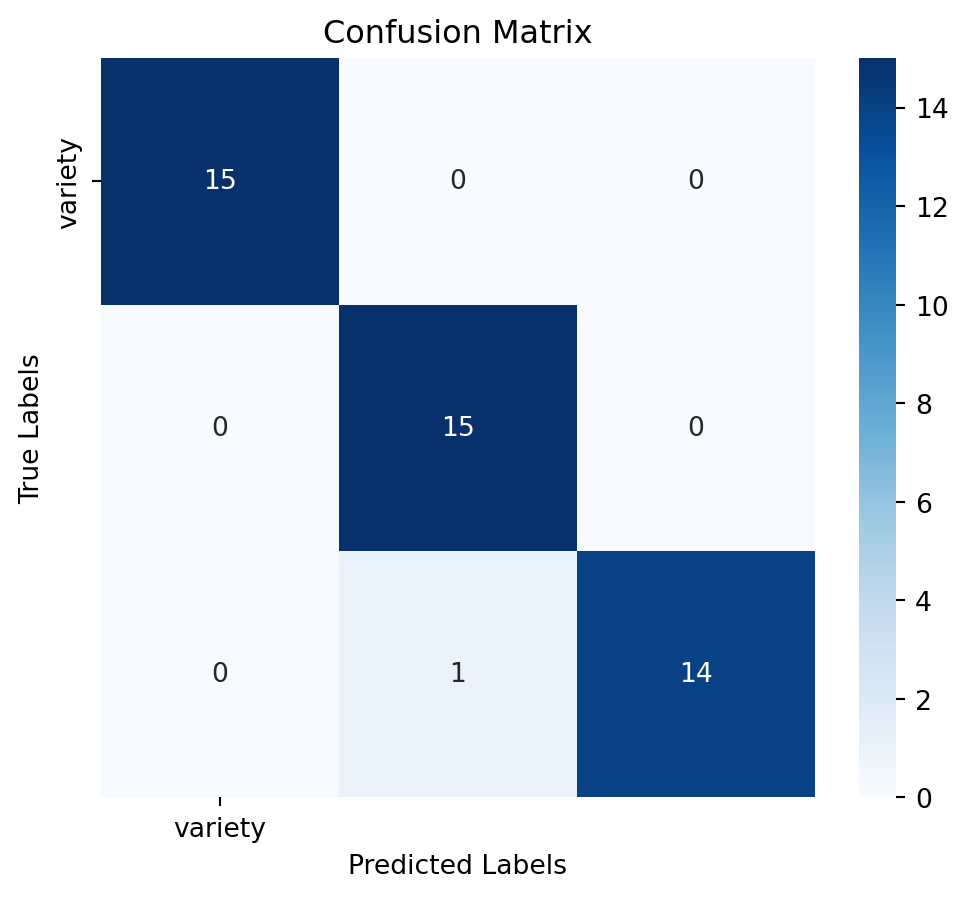

In [43]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [44]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 3. Support Vector Machine Classifier
To Train and Evaluate the Logistic Regression Model, follow these steps.

**Step -1: Import Required Libraries Here we need only the SVC instance from the sklearn library. This can be done as follows.


In [45]:
from sklearn.svm import SVC

**Step-2: Initialize the Model

Create an instance of the SVC model:


In [46]:
model = SVC(kernel='linear', C=1.0, random_state=seed)

**Step-3. Train the Model

Fit the model to the training data:


In [47]:
model.fit(X_train, y_train.values.ravel())

SVC(kernel='linear', random_state=42)

**Step-4: Make Predictions**

Use the trained model to predict the labels for the test set:


In [48]:
y_pred = model.predict(X_test)

**Step-5 Evaluate the Model**

Assess the model’s performance using confussion matrix, model accuracy and a detailed classification report:


In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate classification report
report = classification_report(y_test, y_pred)

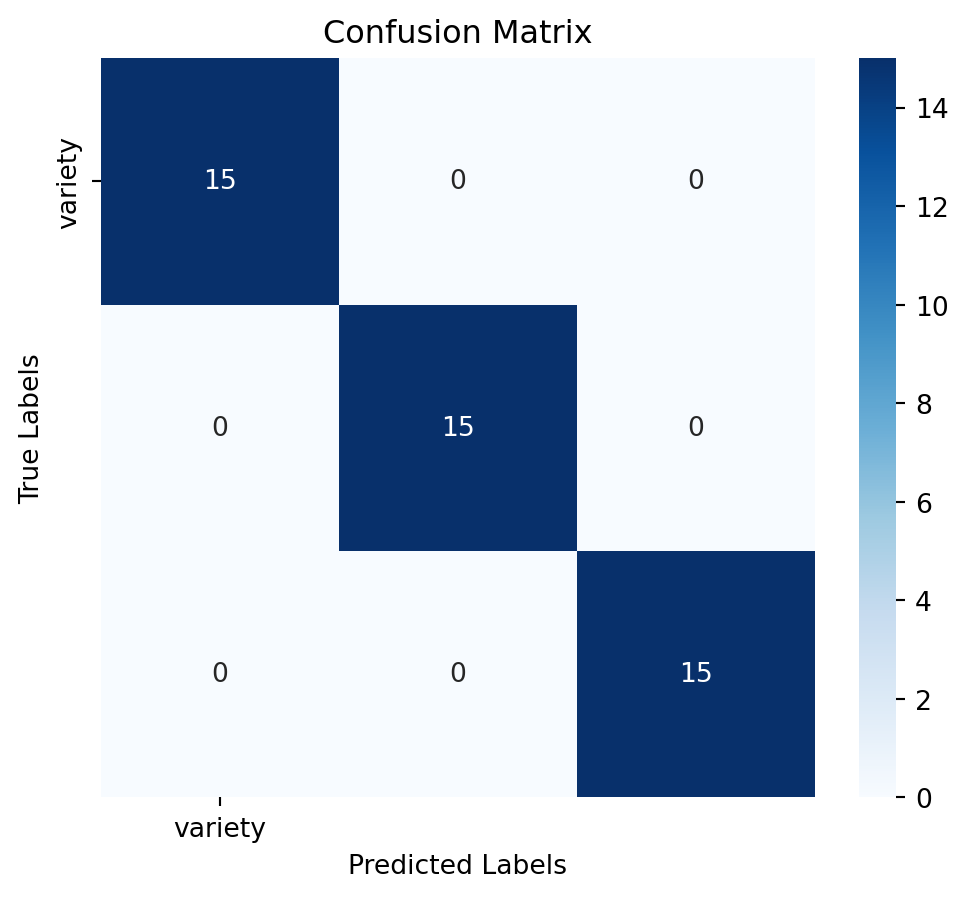

In [50]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [51]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 5. Random Forest Classifier
To Train and Evaluate the RandomForest Model, follow these steps.

**Step -1: Import Required Libraries** Here we need only the Random Forest instance from the sklearn library. This can be done as follows.


In [52]:
from sklearn.ensemble import RandomForestClassifier

**Step-2: Initialize the Model**

Create an instance of the RandomForest model:


In [53]:
Rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)

**Step-3: Train the Model**

Fit the model to the training data:


In [54]:
Rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

**Step-4: Make Predictions**

Use the trained model to predict the labels for the test set:


In [55]:
y_pred = Rf_model.predict(X_test)

**Step-5: Evaluate the Model**

Assess the model’s performance using confussion matrix, model accuracy and a detailed classification report:


In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate classification report
report = classification_report(y_test, y_pred)

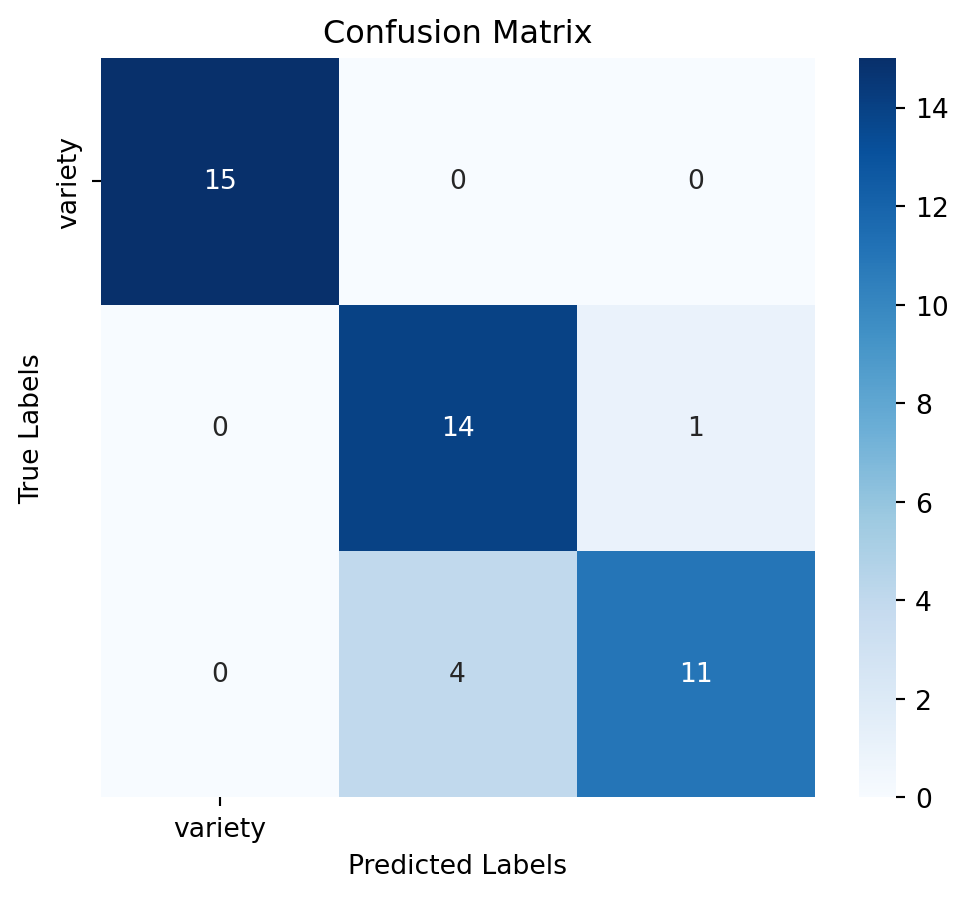

In [57]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [58]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.78      0.93      0.85        15
   Virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



For this project, we will use the RandomForestClassifier, a robust and versatile model that performs well with the Iris dataset.

## 5. Model Selection
After training the model, we will evaluate its performance using various metrics such as accuracy and classification report. This will help us understand how well the model is performing and whether any improvements are needed. In this context, the RandomForestClassifier model is the winner. So we will select and save this model for deployment.


In [59]:
joblib.dump(Rf_model, 'rf_model.sav')

['rf_model.sav']